# Installing and Importing Packages

We will use the OpenCV package for object detection. In order to use OpenCV, we need to install it into our Google Colab environment.

In [1]:
!pip install opencv-python

After that we can use the library called cv2 for object detection. 
We also need to import matplotlib to do some visualizations.

In [2]:
import cv2
from matplotlib import pyplot as plt

print('OpenCV Version: {}'.format(cv2.__version__))

OpenCV Version: 4.1.2


# Load Image

In object detection, we usually take an image as the input. In this case, we want to detect a stop sign in a picture, so we need to load the picture first.

In [3]:
image = cv2.imread('image.jpg')
image

array([[[ 31,  92,  78],
        [ 24,  85,  71],
        [ 15,  77,  63],
        ...,
        [217, 166, 140],
        [217, 166, 140],
        [217, 166, 140]],

       [[ 18,  79,  65],
        [ 17,  78,  64],
        [ 22,  84,  70],
        ...,
        [218, 167, 141],
        [218, 167, 141],
        [218, 167, 141]],

       [[  3,  64,  50],
        [  5,  66,  52],
        [ 26,  88,  74],
        ...,
        [219, 168, 142],
        [219, 168, 142],
        [219, 168, 142]],

       ...,

       [[ 42, 107,  86],
        [ 45, 111,  92],
        [ 55, 120, 104],
        ...,
        [197, 188, 168],
        [127, 121, 102],
        [ 77,  71,  52]],

       [[ 14,  77,  57],
        [ 49, 114,  93],
        [ 75, 139, 120],
        ...,
        [206, 195, 173],
        [119, 112,  92],
        [ 65,  55,  37]],

       [[ 17,  78,  58],
        [ 73, 134, 114],
        [ 98, 160, 142],
        ...,
        [187, 174, 152],
        [101,  93,  70],
        [ 56,  45,  25]]

Wait, is that an image? 

Yes, but the image is in numpy array form. To display the actual image, we need the help of the matplotlib package later on.

In [4]:
image.shape

(551, 979, 3)

# Image Processing

We can write a function that takes an image as argument and display it.

In [5]:
def render_image(image):
    plt.figure(figsize = (8, 6))
    plt.imshow(image)
    plt.show()

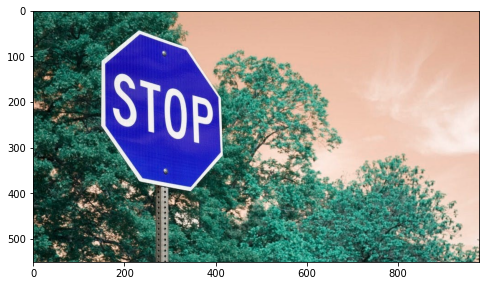

In [6]:
render_image(image)

So here is our input image, but it seems different from real life. Stop sign used to be red in color, but it is displayed in blue color. That is because OpenCV reads an image in BGR form, not RGB like the one we are familiar with.

In order to display image in RGB form, first we need to convert it into RGB using the `cv2.cvtColor()` function.

Besides, we also need to convert our image to grayscale version to reduce the computational requirements.

In [7]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

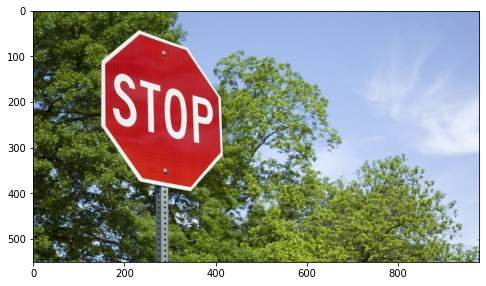

In [8]:
render_image(image_rgb)

Now that's more like it. The image is already converted into RGB. Meanwhile the grayscaled image looks like this.

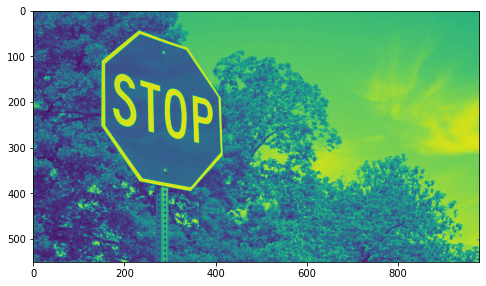

In [9]:
render_image(image_gray)

# Object Detection

To detect and recognize a stop sign, we need to use the actual stop sign classifier (`stop_data.xml`).

In [10]:
stop_data = cv2.CascadeClassifier('stop_data.xml')
stop_data

<CascadeClassifier 0x7f8a00625bb0>

We can detect the stop sign using the `detectMultiScale()` function that takes the grayscale image as well as the minimum size to make sure that small dots that look like a stop sign are detected.

In [16]:
found_objects = stop_data.detectMultiScale(image_gray, minSize = (10, 10))
found_objects

array([[144,  66, 315, 315]], dtype=int32)

In [14]:
n_objects = len(found_objects)
print(f'Number of object(s) detected: {n_objects}')

Number of object(s) detected: 1


In [17]:
print(f'x: {found_objects[0, 0]}')
print(f'y: {found_objects[0, 1]}')
print(f'width: {found_objects[0, 2]}')
print(f'height: {found_objects[0, 3]}')

x: 144
y: 66
width: 315
height: 315


# Draw Rectangle

To indicate that an object is found, we can draw a rectangle around the object. But we only all of that if at least 1 object is detected (`n_objects > 0`). If there is no object detected, we don't need to draw anything. 

We use the `cv2.rectangle()` function to draw a rectangle, which takes several inputs:
- Image
- Start Point
- End Point
- Color
- Thickness

In [19]:
if n_objects > 0:
    for x, y, width, height in found_objects:
        start_point = (x, y)
        end_point = (x + width, y + height)
        color = (0, 255, 0) # green
        cv2.rectangle(image_rgb, start_point, end_point, color = color, thickness = 10)

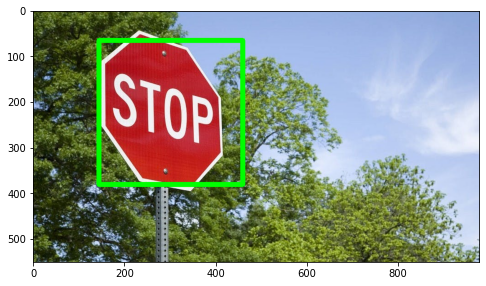

In [20]:
render_image(image_rgb)

Stop sign is detected! 

Here are several links that I used as resources to guide me during this self practice:

https://www.geeksforgeeks.org/detect-an-object-with-opencv-python/

https://www.geeksforgeeks.org/introduction-to-opencv/

https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/